(540, 960, 3)
384.0
[[195, 539, 469, 324, -0.7846715328467153], [176, 539, 367, 395, -0.7539267015706806], [204, 518, 399, 372, -0.7487179487179487], [372, 393, 464, 324, -0.75], [267, 481, 468, 324, -0.7810945273631841], [397, 375, 453, 333, -0.75], [176, 538, 253, 480, -0.7532467532467533]]


/Users/faabdal/miniconda3/envs/carnd-term1/lib/python3.6/site-packages/ipykernel_launcher.py:83: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/Users/faabdal/miniconda3/envs/carnd-term1/lib/python3.6/site-packages/ipykernel_launcher.py:95: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


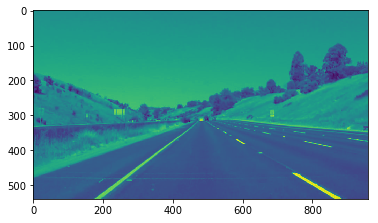

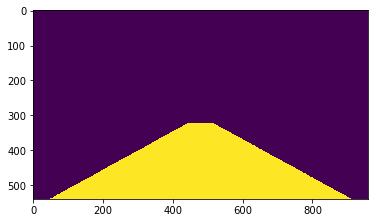

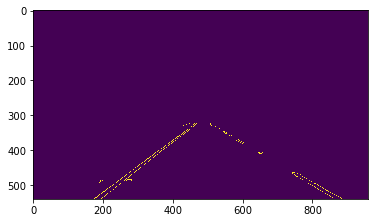

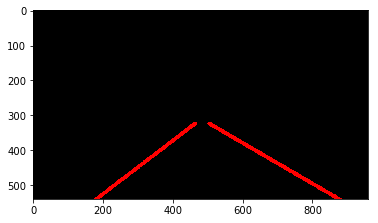

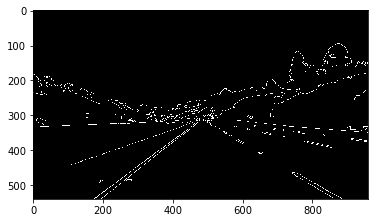

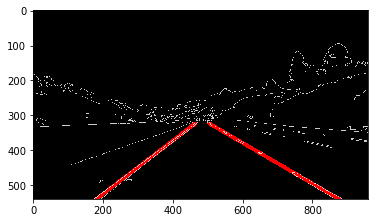

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import time
%matplotlib inline

# Read in and grayscale the image
image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

plt.figure()
plt.imshow(gray)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   


# This time we are defining a four sided polygon to mask
imshape = image.shape
print(imshape)
#vertices = np.array([[(0,imshape[0]),(460, 320), (490, 320), (imshape[1],imshape[0])]], dtype=np.int32)
vertices = np.array([[(imshape[1]*0.05,imshape[0]),(imshape[1]*0.46, (imshape[0])*3/5), (imshape[1]*0.54, (imshape[0])*3/5), (imshape[1]*0.95,imshape[0])]], dtype=np.int32)

#(540, 960, 3)
print(imshape[1]*2/5)


#print(vertices)
cv2.fillPoly(mask, vertices, ignore_mask_color)
plt.figure()
plt.imshow(mask)

masked_edges = cv2.bitwise_and(edges, mask)
plt.figure()
plt.imshow(masked_edges)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 20   # minimum number of votes (intersections in Hough grid cell)
min_line_length = 25 #minimum number of pixels making up a line

# maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image

left_lines = []
right_lines = []

for line in lines:
    for x1,y1,x2,y2 in line:
        slope = (y2-y1)/(x2-x1)
        #print(slope)
        if (slope > 0.1):
            left_lines.append([x1,y1,x2,y2,slope])
        elif (slope < -0.2):
            right_lines.append([x1,y1,x2,y2,slope])

            
imshape = image.shape

            
#Right line
right_cor = np.mean(right_lines, axis=0)
if (right_cor != []):
    x1,y1,x2,y2,slope = right_cor
    b = y1 - slope*x1
    y1_n = imshape[1]
    x1_n = (y1_n - b)/slope
    y2_n = (imshape[0])*3/5
    x2_n = (y2_n - b)/slope
    cv2.line(line_image,(int(x1_n),int(y1_n)),(int(x2_n),int(y2_n)),(255,0,0),10)

#Left line
print(right_lines)
left_cor = np.mean(left_lines, axis=0)
if (left_cor != []):
    x1,y1,x2,y2,slope = np.mean(left_lines, axis=0)
    b = y1 - slope*x1
    y1_n = imshape[1]
    x1_n = (y1_n - b)/slope
    y2_n = (imshape[0])*3/5
    x2_n = (y2_n - b)/slope
    cv2.line(line_image,(int(x1_n),int(y1_n)),(int(x2_n),int(y2_n)),(255,0,0),10)  
plt.figure()


plt.imshow(line_image)        
        
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 
plt.figure()
plt.imshow(color_edges)

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.figure()
plt.imshow(lines_edges)

#plt.imshow(image)



In [97]:
import numpy as np

a = np.array([[1, 2, 3, 4], [3, 4, 5, 6]])
np.mean(a)

#print(np.mean(a, axis=0))

b = []
b.append([7, 8, 9])
b.append([10, 2, 9])
print(b)

print(np.mean(b, axis=0))





[[7, 8, 9], [10, 2, 9]]
[8.5 5.  9. ]


In [147]:
a = [1.1,2,3]
print(len(a))

if a:
    print('hi')

3
hi
